In [ ]:
# prompt: pip install transformers torch spacy networkx
# python -m spacy download en_core_web_sm

!pip install transformers torch spacy networkx
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracted Segments:

 If the temperature rises above 100 degrees , the substance will melt . 

Because of this , the reaction will speed up . 

After the substance melts , the reaction rate increases . 


Classified Relationships:
['unknown', 'unknown']


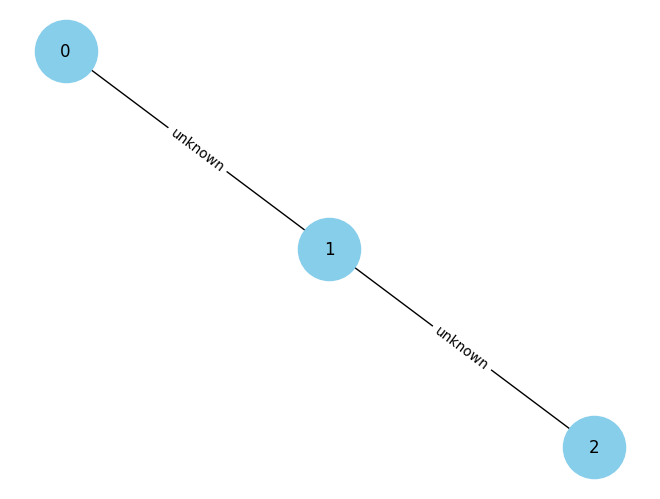

In [ ]:
import spacy
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import torch
import networkx as nx
from sklearn.preprocessing import LabelEncoder

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Load a spaCy model for dependency parsing
nlp = spacy.load("en_core_web_sm")

# A simple function to classify relations (placeholders for now)
def classify_relation(text):
    """
    Placeholder function for classifying relationships like causality, conditions, etc.
    In a production system, this should be replaced with an actual classifier or logic.
    """
    if "because" in text or "due to" in text:
        return "causality"
    elif "if" in text or "then" in text:
        return "condition"
    elif "after" in text or "before" in text:
        return "sequence"
    elif "more than" in text or "less than" in text:
        return "comparison"
    else:
        return "unknown"

# Function to extract key segments of a text using dependency parsing
def extract_text_segments(text):
    """
    Extracts meaningful segments of text using dependency parsing.
    """
    doc = nlp(text)
    segments = []
    for sent in doc.sents:
        segments.append(' '.join([token.text for token in sent]))
    return segments

# Function to generate a preliminary graph representation based on relationships
def create_text_graph(segments, relationships):
    """
    Creates a graph representation of the text, where nodes are text segments
    and edges represent the logical relationships between the segments.
    """
    G = nx.Graph()

    # Add nodes (text segments) to the graph
    for i, seg in enumerate(segments):
        G.add_node(i, text=seg)

    # Add edges based on relationships
    for i in range(len(segments) - 1):
        rel = relationships[i]
        G.add_edge(i, i + 1, relation=rel)

    return G

# Example text input (can be replaced with any text)
text = """
If the temperature rises above 100 degrees, the substance will melt.
Because of this, the reaction will speed up.
After the substance melts, the reaction rate increases.
"""

# Step 1: Extract segments from the text
segments = extract_text_segments(text)
print("Extracted Segments:")
for segment in segments:
    print(segment)

# Step 2: Classify relationships between the segments
relationships = [classify_relation(segments[i] + " " + segments[i + 1]) for i in range(len(segments) - 1)]
print("\nClassified Relationships:")
print(relationships)

# Step 3: Create a graph based on the relationships
graph = create_text_graph(segments, relationships)

# Step 4: Visualize the graph (optional)
import matplotlib.pyplot as plt
pos = nx.spring_layout(graph)
labels = nx.get_node_attributes(graph, 'text')
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color="skyblue")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=nx.get_edge_attributes(graph, 'relation'))
plt.show()


In [ ]:
!pip install torch_geometric torch-scatter torch-sparse torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
# import libraries after installation
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric  # This import should now work
from torch_geometric.nn import GCNConv
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data





Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperators

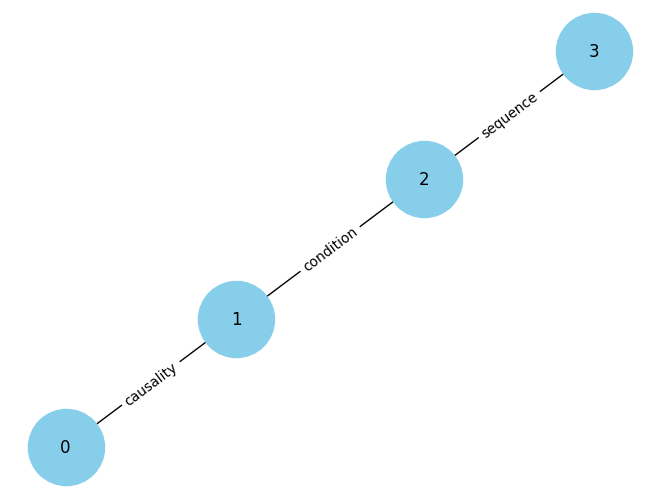

Epoch 1/50, Loss: 0.7479
Epoch 2/50, Loss: 0.6698
Epoch 3/50, Loss: 0.6955
Epoch 4/50, Loss: 0.7825
Epoch 5/50, Loss: 0.6940
Epoch 6/50, Loss: 0.7322
Epoch 7/50, Loss: 0.6924
Epoch 8/50, Loss: 0.7221
Epoch 9/50, Loss: 0.7196
Epoch 10/50, Loss: 0.6945
Epoch 11/50, Loss: 0.6773
Epoch 12/50, Loss: 0.6798
Epoch 13/50, Loss: 0.6809
Epoch 14/50, Loss: 0.6711
Epoch 15/50, Loss: 0.6827
Epoch 16/50, Loss: 0.6850
Epoch 17/50, Loss: 0.6862
Epoch 18/50, Loss: 0.6907
Epoch 19/50, Loss: 0.7008
Epoch 20/50, Loss: 0.6512
Epoch 21/50, Loss: 0.6755
Epoch 22/50, Loss: 0.6501
Epoch 23/50, Loss: 0.6917
Epoch 24/50, Loss: 0.6476
Epoch 25/50, Loss: 0.6817
Epoch 26/50, Loss: 0.6317
Epoch 27/50, Loss: 0.6491
Epoch 28/50, Loss: 0.6683
Epoch 29/50, Loss: 0.6394
Epoch 30/50, Loss: 0.6853
Epoch 31/50, Loss: 0.6650
Epoch 32/50, Loss: 0.6965
Epoch 33/50, Loss: 0.6883
Epoch 34/50, Loss: 0.6855
Epoch 35/50, Loss: 0.6618
Epoch 36/50, Loss: 0.6340
Epoch 37/50, Loss: 0.6861
Epoch 38/50, Loss: 0.6602
Epoch 39/50, Loss: 0.

In [ ]:
# Define a simple GCN model for graph-based reasoning
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # First GCN layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Second GCN layer
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Function to create a PyTorch Geometric graph from a NetworkX graph
def create_pyg_data(graph):
    # Extract nodes and edges from NetworkX graph
    edge_index = torch.tensor(list(graph.edges), dtype=torch.long).t().contiguous()
    num_nodes = graph.number_of_nodes()

    # Create node feature matrix (for simplicity, using identity features for each node)
    x = torch.eye(num_nodes, dtype=torch.float)

    # Create the data object for PyTorch Geometric
    data = Data(x=x, edge_index=edge_index)
    return data

# Example graph (from the previous step)
# Let's assume we have a simple graph with 4 nodes and relationships as edges
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1), (1, 2), (2, 3)])  # Simple chain as an example

# Add attributes (edges with relations)
nx.set_edge_attributes(G, {(0, 1): {'relation': 'causality'}, (1, 2): {'relation': 'condition'}, (2, 3): {'relation': 'sequence'}})

# Visualize the graph (optional)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=3000)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

# Step 1: Prepare the graph for PyTorch Geometric
data = create_pyg_data(G)

# Step 2: Create the GCN model
in_channels = data.x.shape[1]  # Node feature size (identity matrix)
hidden_channels = 16  # Hidden layer size
out_channels = 2  # Number of output classes (for example, for classification tasks)

model = GCN(in_channels, hidden_channels, out_channels)

# Step 3: Define a simple optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Step 4: Train the model (simplified, just for demonstration)
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)

    # Here, we need labels for training (use dummy labels for this example)
    labels = torch.tensor([0, 1, 0, 1], dtype=torch.long)  # Example labels

    # Calculate loss and backpropagate
    loss = criterion(out, labels)
    loss.backward()
    optimizer.step()

    return loss.item()

# Training loop (for a few epochs)
num_epochs = 50
for epoch in range(num_epochs):
    loss = train()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")

# Step 5: Make predictions after training (use the trained GCN for reasoning)
model.eval()
out = model(data.x, data.edge_index)
print("Model Output (Predictions):", out)

# Example: Perform reasoning over the graph (interpreting the outputs)
# For instance, we could use the predicted labels (nodes' class)
predicted_labels = out.argmax(dim=1)
print("Predicted Labels for Nodes:", predicted_labels)

**To develop a rule-based system for generating multiple-choice questions (MCQs) based on identified logical relationships like causality and conditionals, we can follow a few straightforward steps:**

Causal Relationships: For causal relationships (e.g., "because", "due to"), we can generate Why questions (e.g., "Why did X happen?").

Conditional Relationships: For conditional relationships (e.g., "if", "then"), we can generate What if questions (e.g., "What happens if X occurs?").

Answer Choices: Each question will have multiple answer choices. We can generate a few plausible options, with one being the correct answer.

**Steps for Rule-Based Question Generation:**
Identify and classify relationships: We classify the relationships into categories (causality, condition, etc.).
Generate questions: Based on the relationship, we create questions like "Why", "What if", etc.
Generate options: Provide multiple choices for each question, where one option is correct, and the rest are plausible distractors.

In [ ]:
!pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [ ]:
# prompt: pip install random

import random

In [ ]:
import random

# Sample text segments and their identified relationships (for demonstration)
segments = [
    "If the temperature rises above 100 degrees, the substance will melt.",
    "Because of this, the reaction will speed up.",
    "After the substance melts, the reaction rate increases.",
    "The substance will freeze when the temperature drops below 0 degrees."
]

relationships = [
    "condition",  # "If the temperature rises above 100 degrees..."
    "causality",  # "Because of this..."
    "sequence",   # "After the substance melts..."
    "condition"   # "When the temperature drops below 0 degrees..."
]

# Rule-based function to generate multiple-choice questions based on the relationships
def generate_mcq(segments, relationships):
    questions = []

    for i, (seg, rel) in enumerate(zip(segments, relationships)):
        question = ""
        correct_answer = ""
        choices = []

        # Generate questions based on the relationship type
        if rel == "causality":
            question = f"Why did the reaction speed up in the following scenario? {seg}"
            correct_answer = "Because of the increase in temperature, the reaction rate increased."
            choices = [
                correct_answer,
                "Because the substance was heated directly.",
                "Because the pressure was increased.",
                "Because of a chemical catalyst."
            ]

        elif rel == "condition":
            question = f"What happens if the temperature rises above 100 degrees in the following scenario? {seg}"
            correct_answer = "The substance will melt."
            choices = [
                correct_answer,
                "The substance will freeze.",
                "The reaction rate decreases.",
                "The substance will remain unchanged."
            ]

        elif rel == "sequence":
            question = f"What happens after the substance melts? {seg}"
            correct_answer = "The reaction rate increases."
            choices = [
                correct_answer,
                "The substance solidifies.",
                "The reaction rate decreases.",
                "The temperature remains constant."
            ]

        # Randomize the order of choices
        random.shuffle(choices)

        # Format the question and options
        question_data = {
            "question": question,
            "choices": choices,
            "answer": correct_answer
        }

        questions.append(question_data)

    return questions

# Generate the MCQs based on the segments and relationships
mcqs = generate_mcq(segments, relationships)

# Display the generated multiple-choice questions
for idx, mcq in enumerate(mcqs, 1):
    print(f"Q{idx}: {mcq['question']}")
    for i, choice in enumerate(mcq['choices'], 1):
        print(f"  {i}. {choice}")
    print(f"Answer: {mcq['answer']}\n")


Q1: What happens if the temperature rises above 100 degrees in the following scenario? If the temperature rises above 100 degrees, the substance will melt.
  1. The substance will freeze.
  2. The substance will melt.
  3. The substance will remain unchanged.
  4. The reaction rate decreases.
Answer: The substance will melt.

Q2: Why did the reaction speed up in the following scenario? Because of this, the reaction will speed up.
  1. Because of a chemical catalyst.
  2. Because the pressure was increased.
  3. Because of the increase in temperature, the reaction rate increased.
  4. Because the substance was heated directly.
Answer: Because of the increase in temperature, the reaction rate increased.

Q3: What happens after the substance melts? After the substance melts, the reaction rate increases.
  1. The reaction rate increases.
  2. The reaction rate decreases.
  3. The temperature remains constant.
  4. The substance solidifies.
Answer: The reaction rate increases.

Q4: What hap